> [Multi variable linear regression](https://youtu.be/9l1YHo-pbf8?list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

# Lec

regression using many inputs

x1|x2|x3|y
--|--|--|--
73|80|75|152
93|88|93|185
89|91|90|180
96|98|100|196
73|66|70|142


## hypothesis
$
H(x_1, x_2, x_3, ..., x_n) = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b
$

=> using dot product

**important: X가 가로, W가 세로여서 WX가 아닌 XW로 matmul**

$$
\begin{pmatrix}x_1 & x_2 & x_3\end{pmatrix}
\cdot
\begin{pmatrix}y_1 \\ y_2 \\ y_3\end{pmatrix}
=
\begin{pmatrix}x_1y_1 + x_2y_2 + x_3y_3\end{pmatrix}
$$

$$
H(X) = XW
$$

### many x instance

$$
\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
x_{41} & x_{42} & x_{43} \\
x_{51} & x_{52} & x_{53}
\end{pmatrix}
\cdot
\begin{pmatrix}
w_1 \\ w_2 \\ w_3
\end{pmatrix}
=
\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
x_{41} & x_{42} & x_{43} \\
x_{51} & x_{52} & x_{53}
\end{pmatrix}
$$

$$
[5, 3] \cdot [3, 1] = [5, 1]
$$


$$
[n, 3] \cdot [3, 1] = [n, 1]
$$

# LAB

## make hypothesis

In [ ]:
import tensorflow as tf

# data and label
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
Y = [152., 185., 180., 196., 142.]

# weights
w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b  = tf.Variable(tf.random.normal([1]))

lr = 0.000001

for i in range(1000+1):
  with tf.GradientTape() as tape:
    hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  w1.assign_sub(lr * w1_grad)
  w2.assign_sub(lr * w2_grad)
  w3.assign_sub(lr * w3_grad)
  b.assign_sub(lr * b_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |  178116.9531
   50 |    1979.4769
  100 |      25.0426
  150 |       3.3510
  200 |       3.1050
  250 |       3.0970
  300 |       3.0916
  350 |       3.0863
  400 |       3.0810
  450 |       3.0757
  500 |       3.0704
  550 |       3.0651
  600 |       3.0599
  650 |       3.0546
  700 |       3.0494
  750 |       3.0442
  800 |       3.0390
  850 |       3.0338
  900 |       3.0286
  950 |       3.0235
 1000 |       3.0183


## using matrix

In [ ]:
import numpy as np

data = np.array([
    [73., 80., 75., 152.],
    [93., 88., 93., 185.],
    [89., 91., 90., 180.],
    [96., 98., 100., 196.],
    [73., 66., 70., 142.],
], dtype=np.float32)

X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

def predict(X):
  return tf.matmul(X, W) + b

lr = 0.000001

for i in range(2000+1):
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X) - y)))
  W_grad, b_grad = tape.gradient(cost, [W, b])

  W.assign_sub(lr * W_grad)
  b.assign_sub(lr * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))

    0 |   184.1738
  100 |     0.9645
  200 |     0.9380
  300 |     0.9341
  400 |     0.9302
  500 |     0.9264
  600 |     0.9226
  700 |     0.9188
  800 |     0.9150
  900 |     0.9113
 1000 |     0.9076
 1100 |     0.9038
 1200 |     0.9001
 1300 |     0.8964
 1400 |     0.8928
 1500 |     0.8891
 1600 |     0.8855
 1700 |     0.8819
 1800 |     0.8783
 1900 |     0.8747
 2000 |     0.8712


## keras version

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
[[167.71928]]


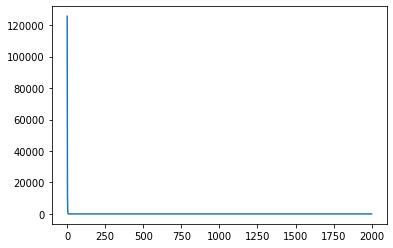

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [73., 80., 75., 152.],
    [93., 88., 93., 185.],
    [89., 91., 90., 180.],
    [96., 98., 100., 196.],
    [73., 66., 70., 142.],
], dtype=np.float32)

X = data[:, :-1]
y = data[:, [-1]]

model = keras.Sequential()

model.add(keras.layers.Dense(units=1, input_dim=3))
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-5))
model.summary()

history = model.fit(X, y, epochs=2000, verbose=0)

y_predict = model.predict([[72., 93., 90.]])
print(y_predict)

plt.plot(history.history['loss'])

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'